<h2 align="center">Create a Simple GAN in PyTorch to Generate Synthetic Sine Wave Data</h2>
<h3>Vaibhav Sharma <br> 22070126125 <br> AIML-B2</h3>

<h3>Introduction</h3>
<p>This project demonstrates the implementation of a simple Generative Adversarial Network (GAN) in PyTorch to generate synthetic sine wave data. The GAN consists of a generator and a discriminator. The generator learns to produce synthetic sine waves that resemble real sine wave data, while the discriminator learns to distinguish between real and generated data.</p>


In [12]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

<h3>1. Define the Generator Class</h3>
    <p>The generator is a neural network that takes random noise as input and generates a sine wave as output. It uses two fully connected layers with a ReLU activation function to model the sine wave data.</p>


In [13]:
class Generator(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, output_size)
        )

    def forward(self, x):
        return self.model(x)

<h3>2. Define the Discriminator Class</h3>
    <p>The discriminator is a neural network that takes sine wave data as input and predicts whether it is real or generated. It also uses two fully connected layers and outputs a single value with a sigmoid activation.</p>


In [14]:
class Discriminator(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

<h3>3. Hyperparameters</h3>
    <p>Key hyperparameters for the GAN include:</p>
    <ul>
        <li><strong>Latent Vector Size:</strong> Defines the dimensionality of the input noise vector fed to the generator. A larger size provides more capacity for the generator to capture complex patterns.</li>
        <li><strong>Hidden Layer Size:</strong> Determines the number of neurons in the hidden layers of both the generator and discriminator. Larger hidden layers allow the network to learn more complex mappings.</li>
        <li><strong>Learning Rate:</strong> Specifies the step size for the optimizer during weight updates. A smaller learning rate ensures stable convergence, while a larger one speeds up training but may lead to instability.</li>
        <li><strong>Number of Epochs:</strong> Represents the number of full passes through the training dataset. More epochs typically lead to better performance, though overfitting can occur with excessive training.</li>
    </ul>

In [15]:
latent_size = 5
hidden_size = 128
sine_wave_size = 50
num_epochs = 10000
batch_size = 32
learning_rate = 0.001

<h3>4. Generate Real Sine Wave Data</h3>
    <p>Real sine wave data is generated using the <code>generate_sine_wave</code> function. It creates sine waves with random phase shifts for variability.</p>
    <p>The equation for generating a sine wave with a phase shift is:</p>
    <p><strong>y(t) = sin(t + φ)</strong></p>
    <p>Where:</p>
    <ul>
        <li><strong>y(t):</strong> The sine wave value at time <em>t</em>.</li>
        <li><strong>t:</strong> The time step.</li>
        <li><strong>φ:</strong> The random phase shift applied to introduce variability.</li>
    </ul>

In [16]:
def generate_sine_wave(num_samples, num_points):
    x = np.linspace(0, 2 * np.pi, num_points)
    data = [np.sin(x + np.random.uniform(0, 2 * np.pi)) for _ in range(num_samples)]
    return np.array(data)

In [17]:
real_data = generate_sine_wave(1000, sine_wave_size)
real_data = torch.tensor(real_data, dtype=torch.float32)

generator = Generator(latent_size, hidden_size, sine_wave_size)
discriminator = Discriminator(sine_wave_size, hidden_size)

<h3>5. Training the GAN</h3>
    <p>The training process involves alternating updates to the generator and discriminator using the binary cross-entropy loss function. The discriminator learns to classify real and fake data, while the generator learns to produce data that the discriminator cannot distinguish from real data.</p>


In [18]:
criterion = nn.BCELoss()
optimizer_g = torch.optim.Adam(generator.parameters(), lr=learning_rate)
optimizer_d = torch.optim.Adam(discriminator.parameters(), lr=learning_rate)

In [ ]:
for epoch in range(num_epochs):
    for _ in range(batch_size):
        real_samples = real_data[torch.randint(0, real_data.size(0), (batch_size,))]
        real_labels = torch.ones((batch_size, 1))
        fake_samples = generator(torch.randn(batch_size, latent_size))
        fake_labels = torch.zeros((batch_size, 1))

        optimizer_d.zero_grad()

        real_loss = criterion(discriminator(real_samples), real_labels)
        fake_loss = criterion(discriminator(fake_samples.detach()), fake_labels)
        d_loss = real_loss + fake_loss

        d_loss.backward()
        optimizer_d.step()

        optimizer_g.zero_grad()
        fake_labels = torch.ones((batch_size, 1))
        g_loss = criterion(discriminator(fake_samples), fake_labels)

        g_loss.backward()
        optimizer_g.step()

    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], D Loss: {d_loss.item():.4f}, G Loss: {g_loss.item():.4f}")

Epoch [100/10000], D Loss: 1.0754, G Loss: 0.9724
Epoch [200/10000], D Loss: 1.0293, G Loss: 1.5162
Epoch [300/10000], D Loss: 0.7920, G Loss: 1.5417
Epoch [400/10000], D Loss: 1.0672, G Loss: 1.2702
Epoch [500/10000], D Loss: 0.9248, G Loss: 1.1595
Epoch [600/10000], D Loss: 0.7957, G Loss: 1.5295
Epoch [700/10000], D Loss: 0.9506, G Loss: 1.1904
Epoch [800/10000], D Loss: 1.0752, G Loss: 1.1253
Epoch [900/10000], D Loss: 1.2911, G Loss: 1.0101
Epoch [1000/10000], D Loss: 1.1119, G Loss: 1.3475
Epoch [1100/10000], D Loss: 0.8982, G Loss: 1.0889
Epoch [1200/10000], D Loss: 0.9456, G Loss: 1.2624
Epoch [1300/10000], D Loss: 1.0658, G Loss: 0.9858
Epoch [1400/10000], D Loss: 1.3878, G Loss: 1.3239
Epoch [1500/10000], D Loss: 0.9431, G Loss: 1.4913
Epoch [1600/10000], D Loss: 1.0103, G Loss: 1.1554
Epoch [1700/10000], D Loss: 1.1105, G Loss: 1.2137
Epoch [1800/10000], D Loss: 1.0450, G Loss: 1.0425
Epoch [1900/10000], D Loss: 1.0601, G Loss: 1.2255
Epoch [2000/10000], D Loss: 0.8865, G Lo

<h3>6. Generate and Plot Synthetic Sine Wave Data</h3>
    <p>After training, the generator produces synthetic sine wave data. These waves are plotted to visualize the results.</p>


In [20]:
with torch.no_grad():
    latent_vectors = torch.randn(10, latent_size)
    generated_data = generator(latent_vectors).numpy()

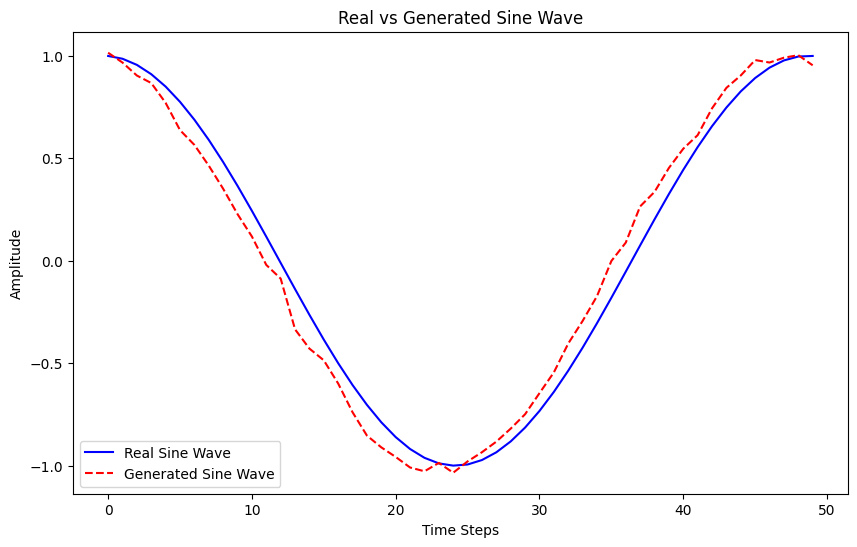

In [ ]:
plt.figure(figsize=(10, 6))

real_wave = real_data[0].numpy()
fake_wave = generated_data[0]

plt.plot(real_wave, label="Real Sine Wave", color='blue')

plt.plot(fake_wave, label="Generated Sine Wave", linestyle='--', color='red')

plt.title("Real vs Generated Sine Wave")
plt.xlabel("Time Steps")
plt.ylabel("Amplitude")
plt.legend()

plt.show()

<h2>Key Observations</h2>
    <ul>
        <li><strong>General Similarity:</strong> The generated sine wave (red dashed line) closely follows the overall shape of the real sine wave (blue solid line), replicating periodicity, amplitude, and general structure.</li>
        <li><strong>Amplitude Consistency:</strong> Peaks and troughs of the generated wave align well with the real wave, demonstrating the generator’s effectiveness in capturing the range of values (amplitude).</li>
        <li><strong>Phase Alignment:</strong> The generated wave matches the phase of the real wave, showing the generator has learned the timing of oscillations, though slight deviations remain.</li>
        <li><strong>Noise and Smoothness:</strong> The generated wave exhibits minor fluctuations compared to the smooth real sine wave, indicating small artifacts from the GAN’s learning process.</li>
        <li><strong>Deviation Around Transitions:</strong> Differences are more noticeable at transition points where the sine wave changes direction, suggesting the generator struggles with modeling sharp changes in curvature.</li>
    </ul>

<h2>Insights</h2>
    <ul>
        <li><strong>Success in Learning:</strong> The generator has successfully learned the periodic nature of sine waves, showcasing the GAN’s ability to approximate continuous, smooth functions.</li>
        <li><strong>Room for Improvement:</strong> Deviations at critical transition points highlight the need for further refinement to improve the generator’s accuracy in modeling sharp curvature changes.</li>
        <li><strong>Practical Applications:</strong> This GAN framework can be extended to generate more complex time-series data like stock prices, weather patterns, or audio signals, provided the generator is fine-tuned for better precision.</li>
    </ul>


<h3>Conclusion</h3>
    <p>This implementation of a simple GAN demonstrates its ability to learn and generate synthetic sine wave data. It highlights the effectiveness of adversarial training in generating realistic data.</p>
